In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/Users/natalielewis/Desktop/Ironhack/fuel_consumption.csv')

## Finding the "best" combustible:
- Fuel Efficiency (Miles per Gallon, MPG): Calculate the average miles per gallon for each gas type. Higher MPG indicates better fuel efficiency.

- Fuel Consumption Rate: Calculate the average fuel consumption rate (e.g., liters per 100 km) for each gas type. Lower consumption rates indicate greater efficiency.

- Refill Frequency: Analyze the average frequency of refills for each gas type. Fewer refills may indicate better efficiency and convenience for drivers.

- Variability in Performance: Assess the consistency of performance (e.g., fuel efficiency) for each gas type across different driving conditions (e.g., AC on/off, rain/snow/sun). Lower variability may indicate a more reliable option.

### Fuel Efficiency

In [13]:
mpg_type = df.groupby('gas_type')['MPG'].mean()
mpg_df = pd.DataFrame(mpg_type)
mpg_df


,MPG
gas_type,
E10,10.518161
SP98,9.429152


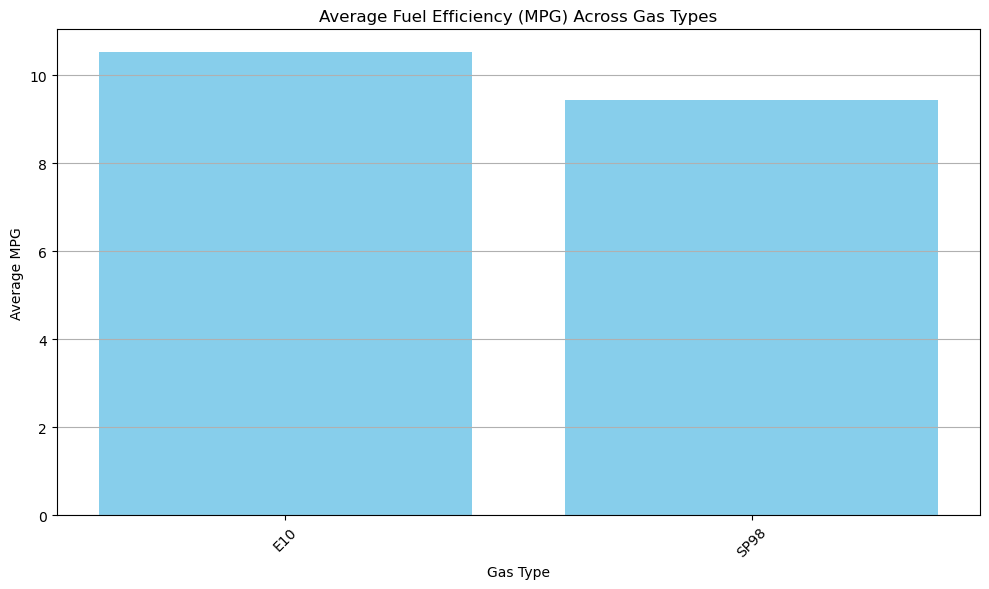

In [12]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(mpg_df.index, mpg_df['MPG'], color='skyblue')
plt.xlabel('Gas Type')
plt.ylabel('Average MPG')
plt.title('Average Fuel Efficiency (MPG) Across Gas Types')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Gas type E10 has higher MPG which indicates greater efficiency

### Fuel Consumption Rate:


In [17]:
consumption_by_type = pd.DataFrame(df.groupby('gas_type')['consumption_rate'].mean())
consumption_by_type

,consumption_rate
gas_type,
E10,43.605585
SP98,50.613591


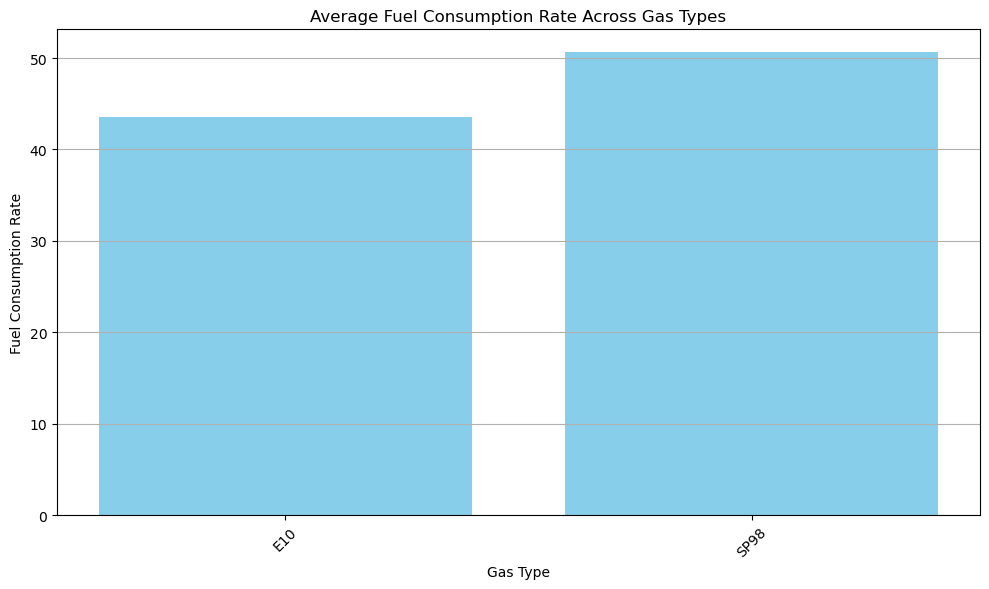

In [18]:
# Fuel Consumption Rate = Bar Plot
plt.figure(figsize=(10, 6))
plt.bar(consumption_by_type.index, consumption_by_type['consumption_rate'], color='skyblue')
plt.xlabel('Gas Type')
plt.ylabel('Fuel Consumption Rate')
plt.title('Average Fuel Consumption Rate Across Gas Types')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


/var/folders/3x/1qc0cd9d1x50tzggtkn0w3t80000gn/T/ipykernel_2022/1121320452.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gas_type', y='consumption_rate', data=df, palette='pastel')


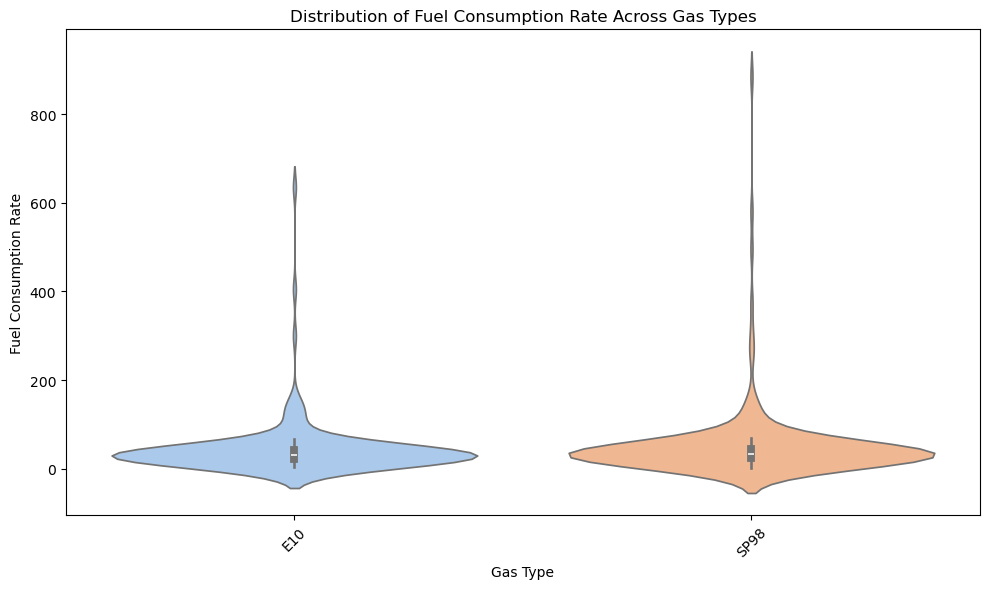

In [20]:
# Fuel Consumption Rate = Box Plot


plt.figure(figsize=(10, 6))
sns.violinplot(x='gas_type', y='consumption_rate', data=df, palette='pastel')
plt.xlabel('Gas Type')
plt.ylabel('Fuel Consumption Rate')
plt.title('Distribution of Fuel Consumption Rate Across Gas Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
distance_intervals = np.linspace(df['distance'].min(), df['distance'].max(), num=10)
avg_consumption_rate = []
for i in range(len(distance_intervals) - 1):
    mask = (df['distance'] >= distance_intervals[i]) & (df['distance'] < distance_intervals[i+1])
    avg_consumption_rate.append(df.loc[mask, 'consumption_rate'].mean())

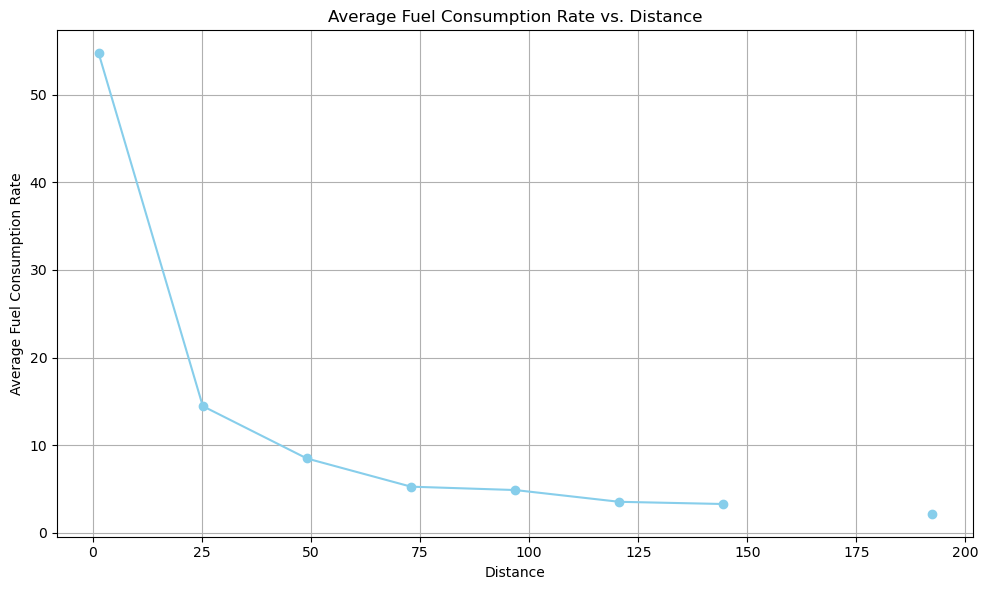

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(distance_intervals[:-1], avg_consumption_rate, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Distance')
plt.ylabel('Average Fuel Consumption Rate')
plt.title('Average Fuel Consumption Rate vs. Distance')
plt.grid()
plt.tight_layout()
plt.show()

#### Gas type E10 has a lower consumption rate, which indicates greater efficiency.

### Refill Frequency:

In [24]:
refill_frequency = pd.DataFrame(df.groupby('refill gas').size().reset_index(name='refill_count'))
refill_frequency

,refill gas,refill_count
0,E10,5
1,SP98,8


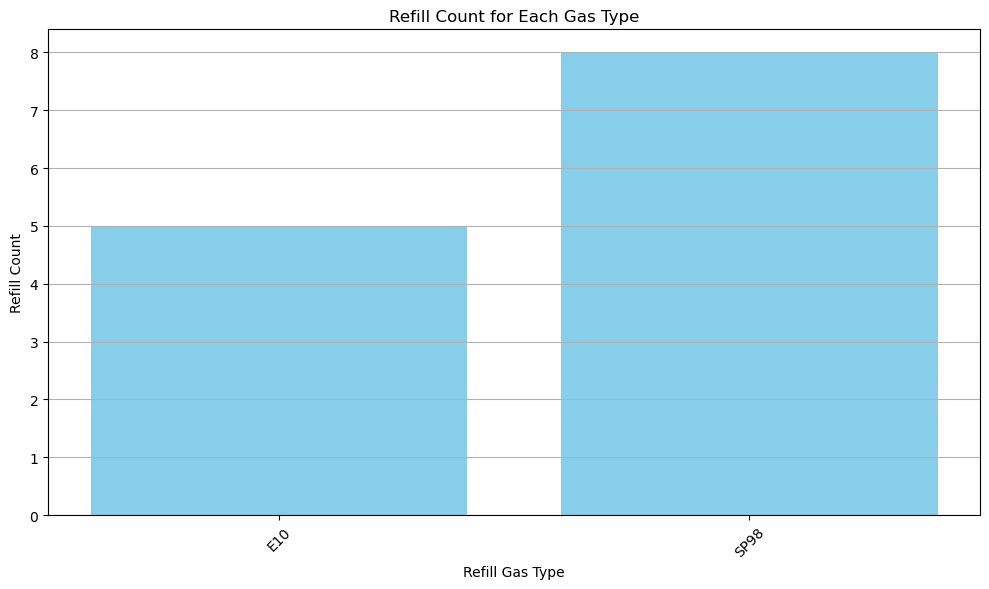

In [25]:
# Visualizing Refill Frequency == Bar Plot

plt.figure(figsize=(10, 6))
plt.bar(refill_frequency['refill gas'], refill_frequency['refill_count'], color='skyblue')
plt.xlabel('Refill Gas Type')
plt.ylabel('Refill Count')
plt.title('Refill Count for Each Gas Type')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Gas E10 has fewer refills which may indicate better efficiency and convenience for drivers.

### Variability in Performance: 

In [29]:
condition_columns = ['AC', 'rain', 'snow', 'sun']

In [36]:
variability_performance = df.groupby(['gas_type'] + condition_columns)['MPG'].std().reset_index(name='MPG_std_dev')
v_performance = pd.DataFrame(variability_performance)
v_performance

,gas_type,AC,rain,snow,sun,MPG_std_dev
0,E10,0,0,0,0,9.504523
1,E10,0,0,0,1,4.599092
2,E10,0,1,0,0,5.120029
3,E10,1,0,0,0,45.398622
4,E10,1,0,0,1,25.086873
5,E10,1,0,1,0,NaN
6,E10,1,1,0,0,0.455213
7,SP98,0,0,0,0,10.285752
8,SP98,0,0,0,1,21.690273
9,SP98,0,0,1,0,0.954765


The coefficient of variation (CV) is a measure of relative variability, calculated as the ratio of the standard deviation to the mean of a dataset. It is often expressed as a percentage. A lower CV indicates lower relative variability, while a higher CV indicates higher relative variability.


In [34]:
mean_mpg = df.groupby('gas_type')['MPG'].mean()
std_mpg = df.groupby('gas_type')['MPG'].std()
cv_mpg = (std_mpg / mean_mpg) * 100

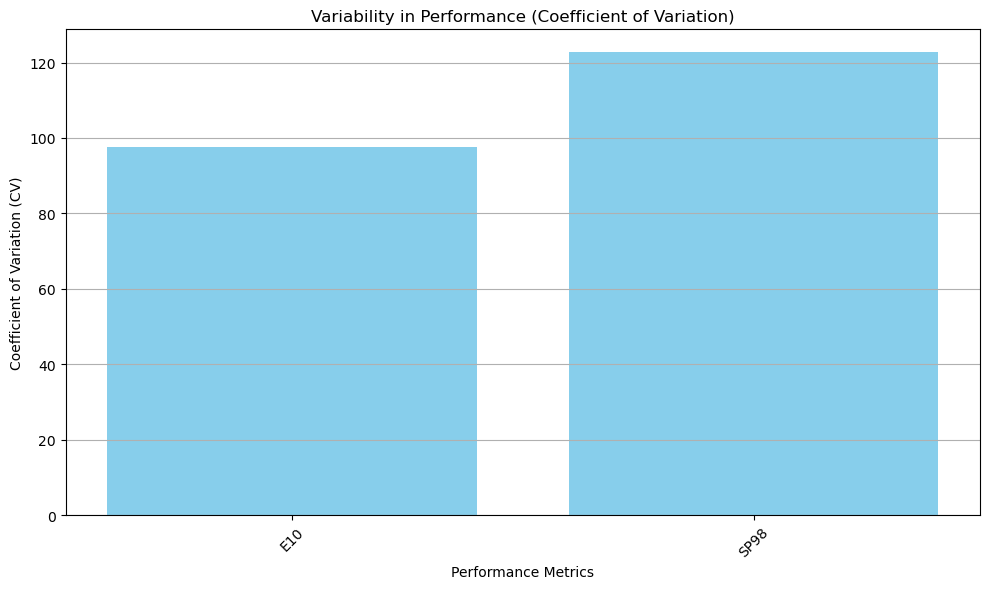

In [35]:
plt.figure(figsize=(10, 6))
plt.bar(cv_mpg.index, cv_mpg.values, color='skyblue')
plt.xlabel('Performance Metrics')
plt.ylabel('Coefficient of Variation (CV)')
plt.title('Variability in Performance (Coefficient of Variation)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Gas type E10 has lower variability which suggests that the gas type tends to perform more reliably in terms of fuel efficiency under various circumstances.